<b>Source: </b>

Book: <i>Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow</i> </br>
Author: <i>Aurelian Geron</i>

# LOAD THE LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# LOAD THE DATA

### Life Satisfaction Dataset

Read CSV

In [2]:
oecd_bli = pd.read_csv(
                    "C:\\Users\\iwan0\\Downloads\\oecd_bli_2015.csv", 
                    thousands=',')

Explore the first 5 rows

In [3]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


Explore the last 5 rows

In [4]:
oecd_bli.tail()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN
3291,OECD,OECD - Total,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.74,NaN,NaN


#### Data Transformation

Filter the life satisfaction dataset where the INEQUALITY column equals to TOT and store the data into a new variable

In [5]:
oecd_bli_inequality_tot = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]

Explore the first 5 rows of the life satisfaction dataset where the INEQUALITY column equals to TOT

In [6]:
oecd_bli_inequality_tot.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


Explore the last 5 rows of the life satisfaction dataset where the INEQUALITY column equals to TOT

In [7]:
oecd_bli_inequality_tot.tail()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
3213,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.90,NaN,NaN
3214,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.48,E,Estimated value
3215,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.97,E,Estimated value
3216,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.62,NaN,NaN
3217,OECD,OECD - Total,WL_TNOW,Time devoted to leisure and personal care,L,Value,TOT,Total,HOUR,Hours,0,units,NaN,NaN,14.97,NaN,NaN


Set the column of country as the index

In [8]:
oecd_bli_inequality_tot_pivot = oecd_bli_inequality_tot.pivot(
                                                            index="Country", 
                                                            columns="Indicator", 
                                                            values="Value")

Explore the first 5 rows after setting the country's column as the index

In [9]:
oecd_bli_inequality_tot_pivot.head()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


Explore the last 5 rows after setting the country's column as the index

In [10]:
oecd_bli_inequality_tot_pivot.tail()

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Sweden,10.0,5.1,10.9,0.0,88.0,1.13,74.0,0.7,29185.0,60328.0,...,1.37,40818.0,92.0,1.7,81.0,482.0,15.11,86.0,95.0,19.3
Switzerland,20.0,4.2,8.4,0.0,86.0,6.72,80.0,0.5,33491.0,108823.0,...,1.46,54236.0,96.0,1.8,81.0,518.0,14.98,49.0,96.0,17.3
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4
United Kingdom,13.0,1.9,11.5,0.2,78.0,12.70,71.0,0.3,27029.0,60778.0,...,2.77,41192.0,91.0,1.9,74.0,502.0,14.83,66.0,88.0,16.4
United States,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,145769.0,...,1.91,56340.0,90.0,2.4,88.0,492.0,14.27,68.0,85.0,17.2


### GDP per Capita

Read CSV

In [11]:
gdp_per_capita = pd.read_csv("C:\\Users\\iwan0\\Downloads\\gdp_per_capita.csv",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1', 
                             na_values="n/a")

Explore the first 5 rows

In [12]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Explore the last 5 rows

In [13]:
gdp_per_capita.tail()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0
189,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


Rename the column name of "2015" to "GDP per Capita"

In [14]:
# Rename the column of 2015 to GDP per Capita
gdp_per_capita_2015 = gdp_per_capita.rename(
                                        columns={"2015": "GDP per capita"}, 
                                        inplace=False)

Explore the first 5 rows after renaming the column

In [15]:
gdp_per_capita_2015.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Explore the last 5 rows after renaming the column

In [16]:
gdp_per_capita_2015.tail()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0
189,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


Set the column of country as the index

In [17]:
# Set the "Country" column to be the index of the dataset
gdp_per_capita_2015.set_index(
                            "Country", 
                            inplace=True)

Explore the first 5 rows after setting the country's column as the index

In [18]:
gdp_per_capita_2015.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


Explore the last 5 rows after setting the country's column as the index

In [19]:
gdp_per_capita_2015.tail()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0
"International Monetary Fund, World Economic Outlook Database, April 2016",NaN,NaN,NaN,NaN,NaN,NaN


# DATA PREPARATION

Merge the two data set that had been prepared nased on their index, which are countries. The two dataset are stored in <b><i>"gdp_per_capita_2015"</i></b> and <b><i>"oecd_bli_inequality_tot_pivot"</i></b>

In [20]:
# Merge the two dataset based on the index (country)
prep_country_stats = pd.merge(
                            left=oecd_bli_inequality_tot_pivot,
                            right=gdp_per_capita_2015,
                            left_index=True,
                            right_index=True)

Explore the first 5 rows after merging the two datasets

In [21]:
prep_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0


Explore the last 5 rows after merging the two datasets

In [22]:
prep_country_stats.tail()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Sweden,10.0,5.1,10.9,0.0,88.0,1.13,74.0,0.7,29185.0,60328.0,...,15.11,86.0,95.0,19.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",49866.266,2014.0
Switzerland,20.0,4.2,8.4,0.0,86.0,6.72,80.0,0.5,33491.0,108823.0,...,14.98,49.0,96.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",80675.308,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
United Kingdom,13.0,1.9,11.5,0.2,78.0,12.70,71.0,0.3,27029.0,60778.0,...,14.83,66.0,88.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43770.688,2015.0
United States,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,145769.0,...,14.27,68.0,85.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",55805.204,2015.0


Sort the dataset based on the GDP per Capita

In [23]:
prep_country_stats.sort_values(
                            by="GDP per capita", 
                            inplace=True)

Explore the first 5 rows after sorting the data based on the GDP per Capita

In [24]:
prep_country_stats.head()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0


Explore the last 5 rows after sorting the data based on the GDP per Capita

In [25]:
prep_country_stats.tail()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,16.06,88.0,94.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
United States,18.0,1.5,8.3,0.1,89.0,11.30,67.0,5.2,41355.0,145769.0,...,14.27,68.0,85.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",55805.204,2015.0
Norway,16.0,3.3,8.1,0.3,82.0,2.82,75.0,0.6,33492.0,8797.0,...,15.56,78.0,94.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0
Switzerland,20.0,4.2,8.4,0.0,86.0,6.72,80.0,0.5,33491.0,108823.0,...,14.98,49.0,96.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",80675.308,2015.0
Luxembourg,12.0,4.3,6.0,0.1,78.0,3.47,66.0,0.4,38951.0,61765.0,...,15.12,91.0,86.0,15.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",101994.093,2014.0


Initiate an array that will be used to remove elements from the dataframe

In [26]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]

print(remove_indices)

[0, 1, 6, 8, 33, 34, 35]


As we know that the number of element in the dataframe is 36, we set the a list of number from 0 to 36, and substract such list with the set of <b><i>"remove_indices"</i></b> array

In [27]:
keep_indices = list(set(range(36)) - set(remove_indices))

print(keep_indices)

[2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


Get the two variables that will be used. The two variables are <b><i>"GDP per capita"</i></b> and <b><i>"Life satisfaction"</i></b>

In [28]:
prep_country_stats[["GDP per capita", 'Life satisfaction']]

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Chile,13340.905,6.7
Slovak Republic,15991.736,6.1
Czech Republic,17256.918,6.5


Explore the <b><i>"remove_indices"</i></b> in the dataset

In [29]:
prep_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


<b><i>Exclude the elements</i></b> which is listed in the array of <b><i>"remove_inidices"</i></b>

In [30]:
prep_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


### Summarize the data preparation into a function

Define function to summarize life satisfaction based on GDP per Capita in each country

In [31]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    
    # Filter the life satisfaction dataset where the INEQUALITY column equals to TOT
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    
    oecd_bli = oecd_bli.pivot(
                            index="Country", 
                            columns="Indicator", 
                            values="Value")
    
    # Rename the column of 2015 to GDP per Capita
    gdp_per_capita.rename(
                        columns={"2015": "GDP per capita"}, 
                        inplace=True)
    
    # Set the "Country" column to be the index of the dataset
    gdp_per_capita.set_index(
                        "Country", 
                        inplace=True)
    
    # Merge the two dataset based on the index (country)
    full_country_stats = pd.merge(
                                left=oecd_bli,
                                right=gdp_per_capita,
                                left_index=True,
                                right_index=True)
    
    # Sort the dataset based on the GDP per Capita
    full_country_stats.sort_values(
                                by="GDP per capita", 
                                inplace=True)
    
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    
    keep_indices = list(set(range(36)) - set(remove_indices))
    
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

Implement the function

In [32]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

Dataset after preparation

In [33]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


In [34]:
country_stats.tail()

,GDP per capita,Life satisfaction
Country,,
Iceland,50854.583,7.5
Australia,50961.865,7.3
Ireland,51350.744,7.0
Denmark,52114.165,7.5
United States,55805.204,7.2


# DATA VISUALIZATION

Prepare the "X" values (GDP per Capita) prior to the visualization

In [35]:
X = np.c_[country_stats["GDP per capita"]]
print(X)

[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]


Prepare the "y" values (Life Satisfaction) prior to the visualization

In [36]:
y = np.c_[country_stats["Life satisfaction"]]
print(y)

[[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]
 [5.6]
 [4.8]
 [5.1]
 [5.7]
 [6.5]
 [5.8]
 [6. ]
 [5.9]
 [7.4]
 [7.3]
 [6.5]
 [6.9]
 [7. ]
 [7.4]
 [7.3]
 [7.3]
 [6.9]
 [6.8]
 [7.2]
 [7.5]
 [7.3]
 [7. ]
 [7.5]
 [7.2]]


Plot the correlation between X (GDP per Capita) and y (Life Satisfaction)

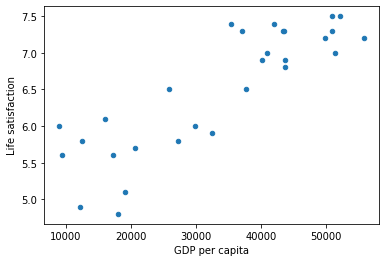

In [45]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# LINEAR MODEL

Initiate the linear regression model

In [46]:
model = sklearn.linear_model.LinearRegression()

Train the Model

In [47]:
model.fit(X, y)

LinearRegression()

### Prediction

Initiate a new X value. In other words, by having the given value of GDP per Capita as much as "22587", the Life Satisfaction will be predicted.

In [49]:
X_new = [[22587]]

print(X_new)

[[22587]]


Apply the linear regression that previously had been intiated to predict the Life Satisfaction based on a given value of GDP per Capita

In [50]:
print(model.predict(X_new))

[[5.96242338]]


### Conclusion

According to the prediction, by having the <b>GDP per Capita</b> as much as "22587", the rate of the <b>life satisfaction</b> will be "5.96"